# **STUDENT SOCIAL MEDIA ADDICTION ANALYSIS**
## By - **[Pratyush Puri](https://pratyushpuri.github.io/PratyushProfile)**


![STUDENT SOCIAL MEDIA ADDICTION](https://i.pinimg.com/736x/ce/67/8b/ce678be43040f3fcf856f0f6547e7146.jpg)



## 1. INTRODUCTION

### **Social Media Addiction Among Students: A Global Data Analysis**

In the digital age, social media platforms have become an integral part of daily life, particularly among students worldwide. With the proliferation of platforms like Instagram, TikTok, Facebook, WhatsApp, and others, understanding the patterns and implications of social media usage has become crucial for educators, policymakers, and mental health professionals.

This comprehensive data analysis project examines social media addiction patterns among 705 students from 110 countries, providing unprecedented insights into global digital behavior trends. The study encompasses diverse demographics, including students from various academic levels (High School, Undergraduate, and Graduate), different age groups (18-24 years), and balanced gender representation across multiple continents.

***Research Objectives***

The primary objectives of this analysis are to:

1. *Identify Global Usage Patterns:* Examine how social media consumption varies across different countries and regions, revealing cultural and geographical influences on digital behavior.
2. *Analyze Platform Preferences:* Investigate which social media platforms dominate usage across different demographics and regions, including Instagram, TikTok, Facebook, WhatsApp, Twitter, and region-specific platforms like WeChat, LINE, and KakaoTalk.
3. *Assess Academic Impact:* Evaluate the relationship between social media usage hours and academic performance, identifying potential correlations between excessive usage and educational outcomes.
4. *Examine Mental Health Correlations:* Analyze the connection between social media addiction scores, mental health indicators, and sleep patterns to understand the broader implications of digital consumption.
5. *Identify Risk Factors:* Determine demographic and behavioral factors that contribute to higher addiction scores and problematic social media usage patterns.

***Dataset Overview***

The dataset comprises 705 student records with comprehensive information including:

- *Demographics:* Age, gender, academic level, and country of residence
- *Usage Metrics:* Average daily usage hours (ranging from 1.5 to 8.5 hours)
- *Platform Data:* Most frequently used social media platforms
- *Impact Indicators:* Academic performance effects, sleep duration, and relationship conflicts
- *Health Metrics:* Mental health scores and addiction severity ratings (2-9 scale)

This rich dataset enables multifaceted analysis of social media addiction patterns, providing valuable insights for understanding the global landscape of student digital behavior and its implications for academic success, mental health, and social relationships.

The findings from this analysis will contribute to evidence-based recommendations for students, educational institutions, and policymakers working to address the challenges and opportunities presented by social media in academic environments.

## 2. DATA LOADING AND INITIAL EXPLORATION

In [1]:
#all libraries that are essential for this analysis

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
from scipy.stats import pearsonr, spearmanr

#ignore warnings (if any)
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
#loading the dataset
df = pd.read_csv('Students Social Media Addiction.csv')

In [ ]:
#Inital Exploration
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [ ]:
#sample of the dataset
df.sample()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
148,149,22,Male,Graduate,Nepal,3.7,Facebook,No,8.3,7,Single,2,5


In [ ]:
#First 5 entries
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [ ]:
#last 5 entries
df.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [ ]:
#information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [ ]:
#all intial columns present in the dataset
df.columns

Index(['Student_ID', 'Age', 'Gender', 'Academic_Level', 'Country',
       'Avg_Daily_Usage_Hours', 'Most_Used_Platform',
       'Affects_Academic_Performance', 'Sleep_Hours_Per_Night',
       'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [ ]:
#No. of rows and Columns in the given dataset
df.shape

(705, 13)

In [ ]:
#Range Index of the dataset
df.index

RangeIndex(start=0, stop=705, step=1)

In [ ]:
#datatypes of all the columns present in the dataset
df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64


In [ ]:
#describing data as a whole including all essential parameters
df.describe(include='all')

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705,705,705,705.000000,705,705,705.000000,705.000000,705,705.000000,705.000000
unique,NaN,NaN,2,3,110,NaN,12,2,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Female,Undergraduate,India,NaN,Instagram,Yes,NaN,NaN,Single,NaN,NaN
freq,NaN,NaN,353,353,53,NaN,249,453,NaN,NaN,384,NaN,NaN
mean,353.000000,20.659574,NaN,NaN,NaN,4.918723,NaN,NaN,6.868936,6.226950,NaN,2.849645,6.436879
std,203.660256,1.399217,NaN,NaN,NaN,1.257395,NaN,NaN,1.126848,1.105055,NaN,0.957968,1.587165
min,1.000000,18.000000,NaN,NaN,NaN,1.500000,NaN,NaN,3.800000,4.000000,NaN,0.000000,2.000000
25%,177.000000,19.000000,NaN,NaN,NaN,4.100000,NaN,NaN,6.000000,5.000000,NaN,2.000000,5.000000
50%,353.000000,21.000000,NaN,NaN,NaN,4.800000,NaN,NaN,6.900000,6.000000,NaN,3.000000,7.000000
75%,529.000000,22.000000,NaN,NaN,NaN,5.800000,NaN,NaN,7.700000,7.000000,NaN,4.000000,8.000000


## 3. DATA CLEANING AND PREPROCESSING

In [ ]:
#checking null items (if any)
df.isnull().any()

,0
Student_ID,False
Age,False
Gender,False
Academic_Level,False
Country,False
Avg_Daily_Usage_Hours,False
Most_Used_Platform,False
Affects_Academic_Performance,False
Sleep_Hours_Per_Night,False
Mental_Health_Score,False


In [ ]:
##summation of null items (if any)
df.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
Academic_Level,0
Country,0
Avg_Daily_Usage_Hours,0
Most_Used_Platform,0
Affects_Academic_Performance,0
Sleep_Hours_Per_Night,0
Mental_Health_Score,0


In [ ]:
#detecting unique entries from each column
df.nunique()

,0
Student_ID,705
Age,7
Gender,2
Academic_Level,3
Country,110
Avg_Daily_Usage_Hours,67
Most_Used_Platform,12
Affects_Academic_Performance,2
Sleep_Hours_Per_Night,59
Mental_Health_Score,6


In [ ]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
#memory footprint
df.memory_usage(deep=True)

,0
Index,132
Student_ID,5640
Age,5640
Gender,43711
Academic_Level,47671
Country,44800
Avg_Daily_Usage_Hours,5640
Most_Used_Platform,45672
Affects_Academic_Performance,42048
Sleep_Hours_Per_Night,5640


In [ ]:
#checking datatypes of each columns
df.dtypes

,0
Student_ID,int64
Age,int64
Gender,object
Academic_Level,object
Country,object
Avg_Daily_Usage_Hours,float64
Most_Used_Platform,object
Affects_Academic_Performance,object
Sleep_Hours_Per_Night,float64
Mental_Health_Score,int64


In [ ]:
#dropping unnecessary columns
df2 = df.drop(columns=['Student_ID'])

In [ ]:
#checking the newly made dataframe
df2.head()

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


***Since there was not very much to do with data cleaning as all the data we find here is already clean***

In [ ]:
# Create addiction severity levels
def categorize_addiction(score):
    if score <= 3:
        return 'Low'
    elif score <= 6:
        return 'Moderate'
    else:
        return 'High'

df2['Addiction_Level'] = df2['Addicted_Score'].apply(categorize_addiction)


## 4. EXPLORATORY DATA ANALYSIS WITH DATA VISUALIZATION

### **Checking for Outlier (if any)**

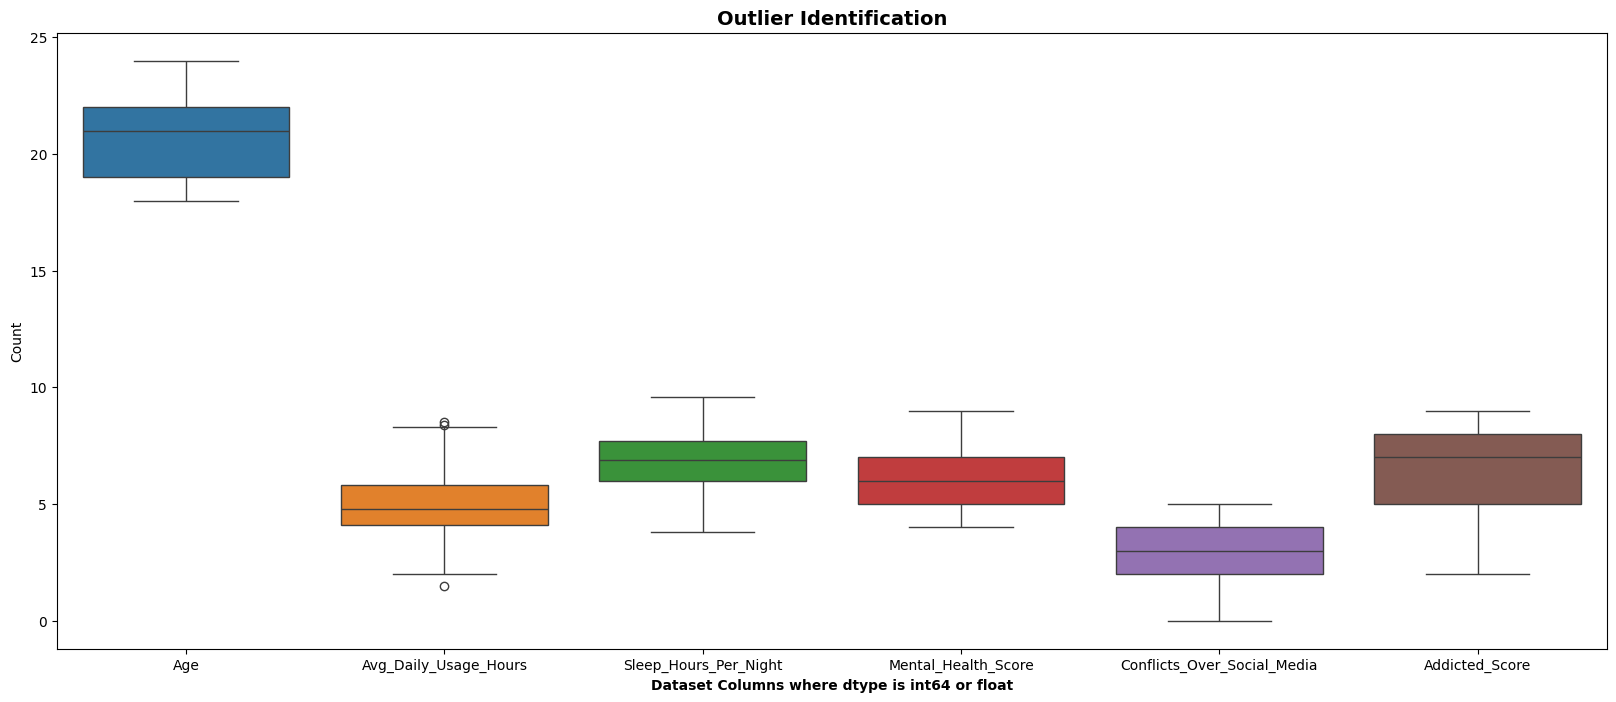

In [ ]:
#Outlier Identification (if any)
plt.figure(figsize=(20,8))
sns.boxplot(data=df2)
plt.title('Outlier Identification',fontsize=14, fontweight='bold')
plt.ylabel('Count')
plt.xlabel('Dataset Columns where dtype is int64 or float', fontweight='bold')
plt.show()

In [ ]:
#using IQR method to cap it

Q1 = df2['Avg_Daily_Usage_Hours'].quantile(0.25)
Q3 = df2['Avg_Daily_Usage_Hours'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df2['Avg_Daily_Usage_Hours'] = np.where(df2['Avg_Daily_Usage_Hours'] > upper_bound, upper_bound,np.where(df2['Avg_Daily_Usage_Hours'] < lower_bound, lower_bound, df2['Avg_Daily_Usage_Hours']))

***Since we detected outlier in column "Avg_Daily_Usage_Hours" so we had to treat it bycapping the values present in it***

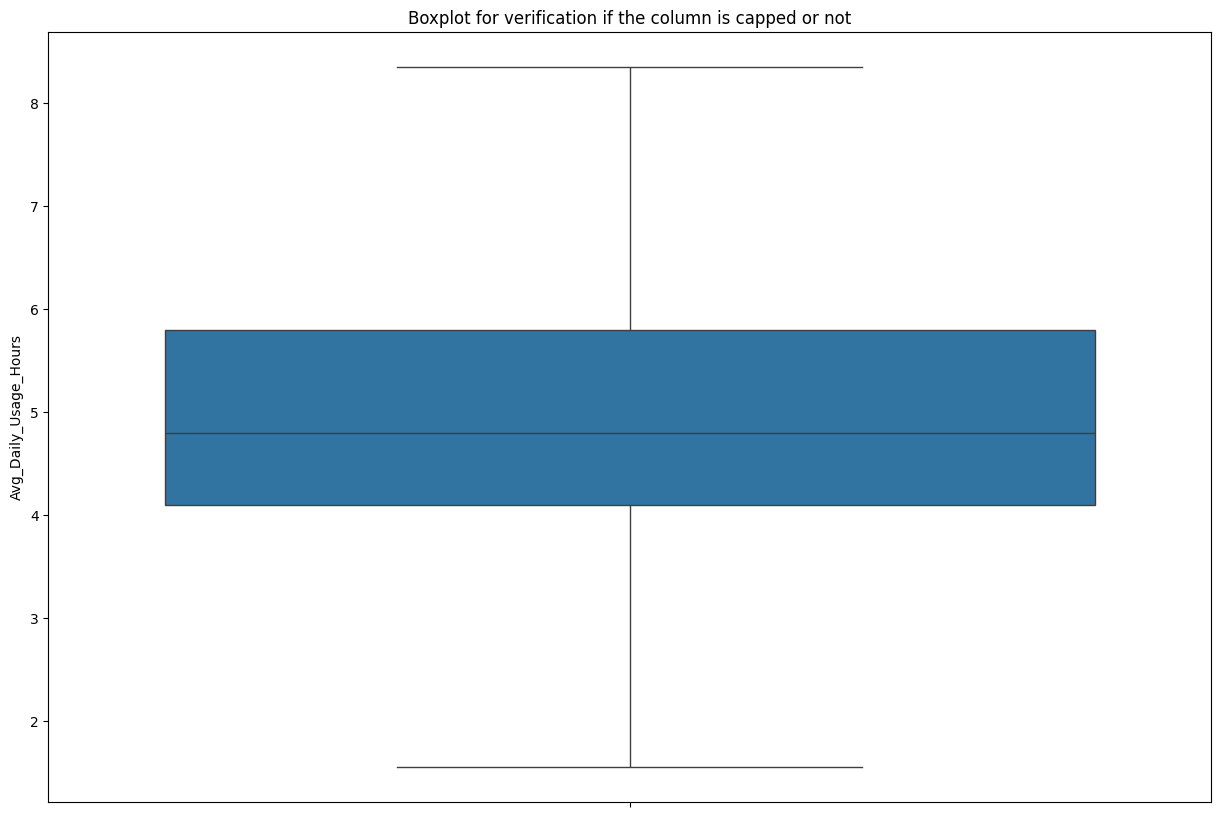

In [ ]:
#re-verification of the column "Avg_Daily_Usage_Hours" if it is capped or not

plt.figure(figsize=(15,10))
sns.boxplot(data=df2['Avg_Daily_Usage_Hours'])
plt.title('Boxplot for verification if the column is capped or not')
plt.show()

### What is the most used platform by students?

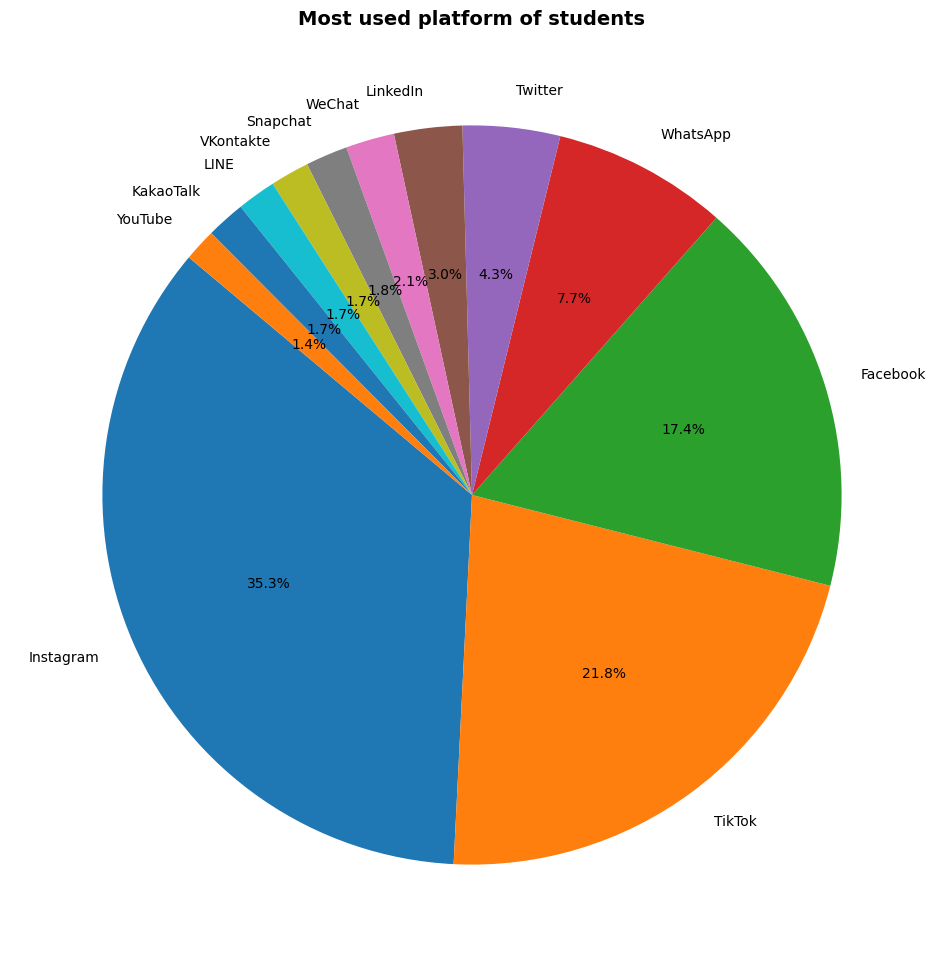

In [ ]:
#platforms on which students addicted
counts = df2['Most_Used_Platform'].value_counts()

plt.figure(figsize=(12, 12))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Most used platform of students',fontsize=14, fontweight='bold')
plt.show()

### **How much time do students spend on social media daily?**

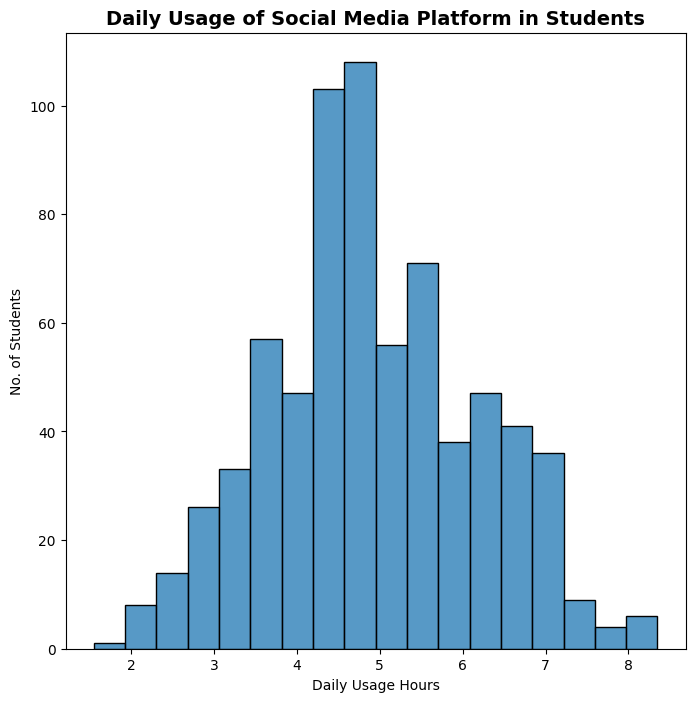

In [ ]:
plt.figure(figsize=(8,8))
sns.histplot(data=df2, x='Avg_Daily_Usage_Hours')
plt.title('Daily Usage of Social Media Platform in Students',fontsize=14, fontweight='bold')
plt.xlabel('Daily Usage Hours')
plt.ylabel('No. of Students')
plt.show()

### What does the relationdship status of the students say?

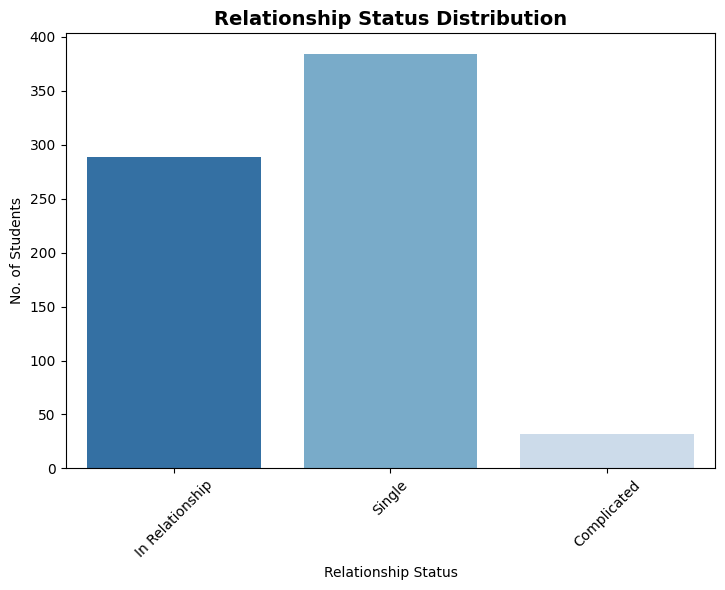

In [ ]:
#relationship status distribution

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 2)
sns.countplot(data=df2, x='Relationship_Status', palette='Blues_r')
plt.title('Relationship Status Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Relationship Status')
plt.ylabel('No. of Students')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### What is the age distribution of Students?

Text(0, 0.5, 'No. of Students')

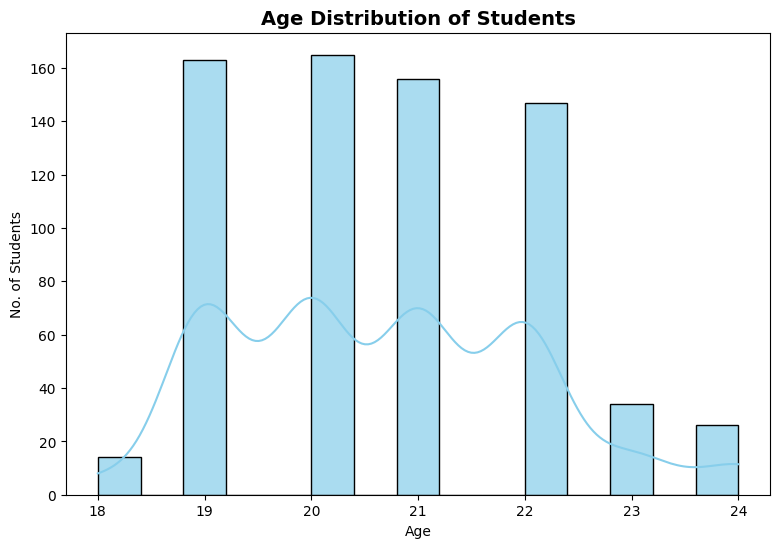

In [ ]:
#age distribution analysis

plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
sns.histplot(df2['Age'], bins=15, kde=True, color='skyblue', alpha=0.7)
plt.title('Age Distribution of Students', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('No. of Students')

### What is the correlation between the usage of social media and the platform on which it is used?

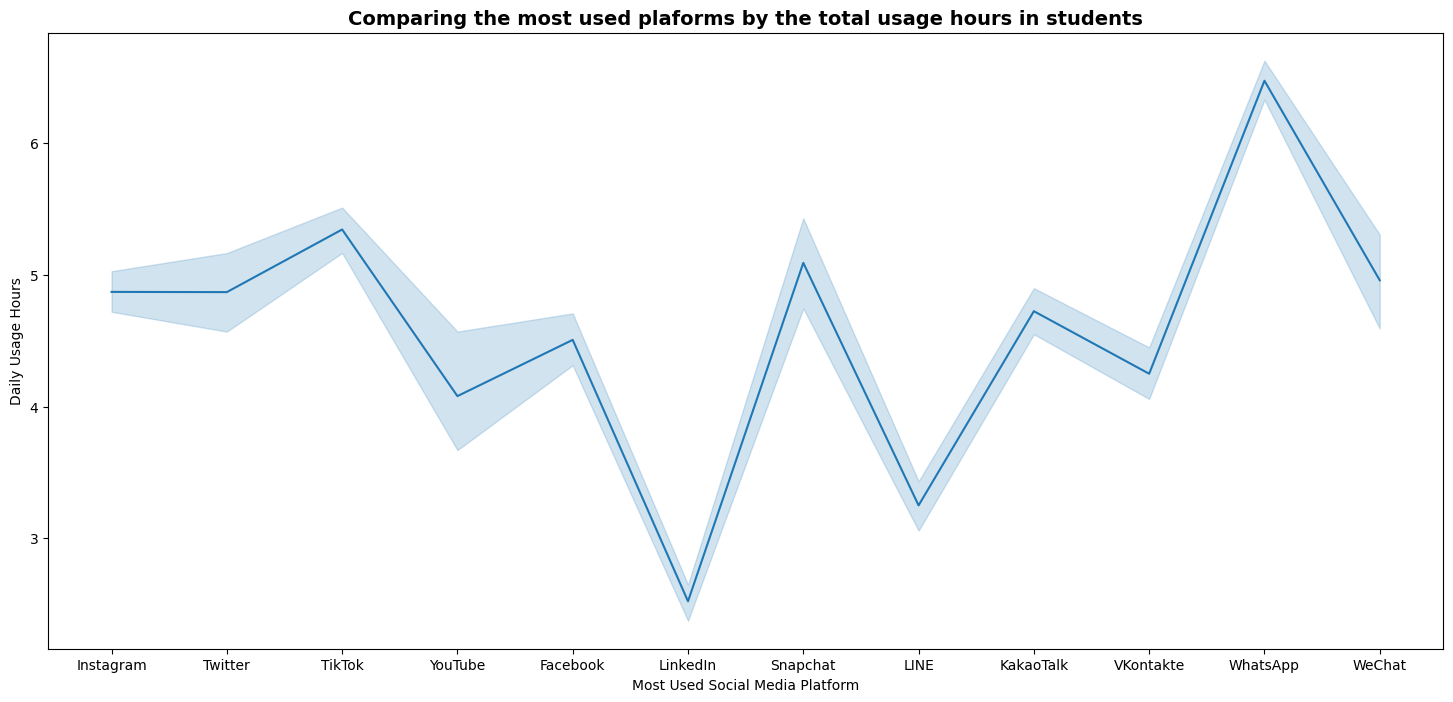

In [ ]:
plt.figure(figsize=(18,8))
sns.lineplot(x='Most_Used_Platform', y='Avg_Daily_Usage_Hours', data=df2)
plt.title('Comparing the most used plaforms by the total usage hours in students',fontsize=14, fontweight='bold')
plt.xlabel('Most Used Social Media Platform')
plt.ylabel('Daily Usage Hours')
plt.show()

### How does the student perform after using the social media for hours?

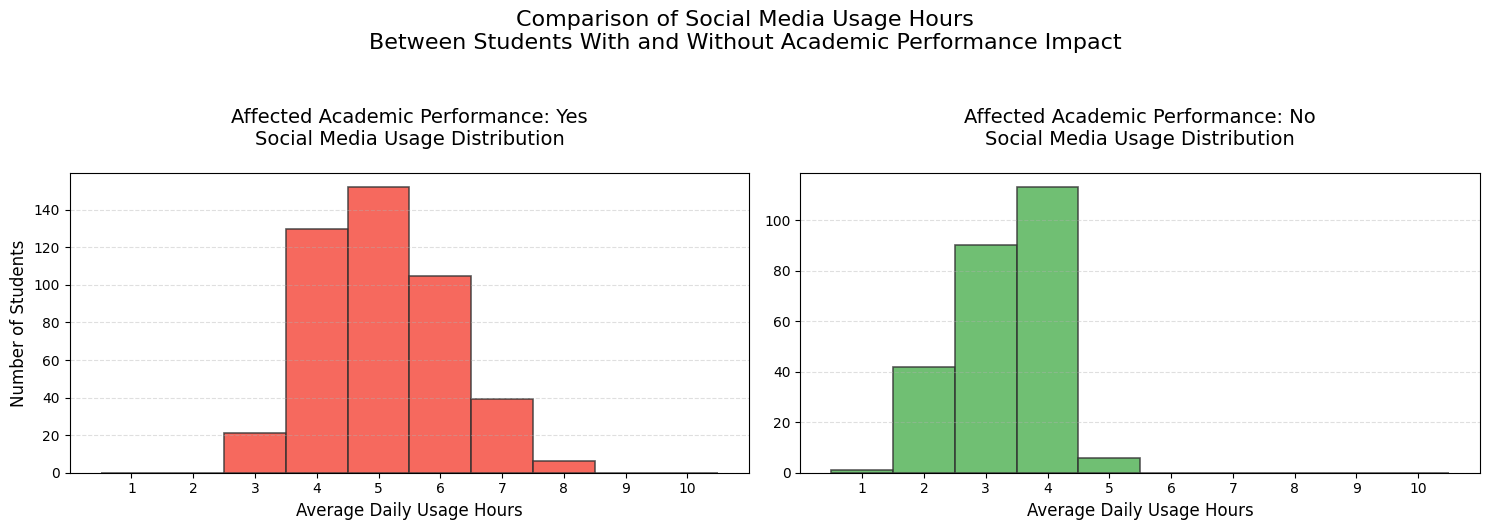

In [ ]:
# here we are choosing the color for different charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
yes_color = '#F44336'
no_color = '#4CAF50'
edge_color = '#333333'

# Histogram for Performance = Yes
yes_data = df2[df2['Affects_Academic_Performance'] == 'Yes']['Avg_Daily_Usage_Hours']
ax1.hist(yes_data, bins=range(1, 12),
         color=yes_color, edgecolor=edge_color,
         linewidth=1.2, alpha=0.8, align='left')
ax1.set_title('Affected Academic Performance: Yes\nSocial Media Usage Distribution',
              fontsize=14, pad=20)
ax1.set_xlabel('Average Daily Usage Hours', fontsize=12)
ax1.set_ylabel('Number of Students', fontsize=12)
ax1.set_xticks(range(1, 11))
ax1.grid(axis='y', linestyle='--', alpha=0.4)

# Histogram for Performance = No
no_data = df2[df2['Affects_Academic_Performance'] == 'No']['Avg_Daily_Usage_Hours']
ax2.hist(no_data, bins=range(1, 12),
         color=no_color, edgecolor=edge_color,
         linewidth=1.2, alpha=0.8, align='left')
ax2.set_title('Affected Academic Performance: No\nSocial Media Usage Distribution',
              fontsize=14, pad=20)
ax2.set_xlabel('Average Daily Usage Hours', fontsize=12)
ax2.set_xticks(range(1, 11))
ax2.grid(axis='y', linestyle='--', alpha=0.4)

plt.suptitle('Comparison of Social Media Usage Hours\nBetween Students With and Without Academic Performance Impact',
             fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

### How much students get sleep after using the social media for hours?

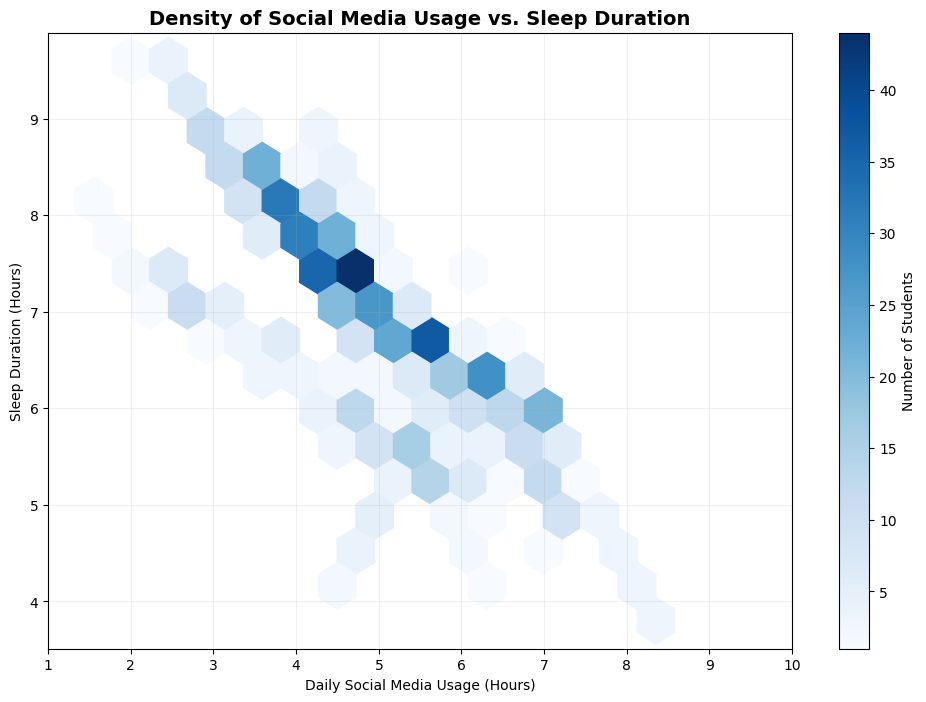

In [ ]:
plt.figure(figsize=(12, 8))
hexbin = plt.hexbin(
    x=df2['Avg_Daily_Usage_Hours'],
    y=df2['Sleep_Hours_Per_Night'],
    gridsize=15,
    cmap='Blues',
    mincnt=1
)
plt.colorbar(hexbin, label='Number of Students')
plt.title('Density of Social Media Usage vs. Sleep Duration',fontsize=14, fontweight='bold')
plt.xlabel('Daily Social Media Usage (Hours)')
plt.ylabel('Sleep Duration (Hours)')
plt.xticks(range(1, 11))
plt.grid(alpha=0.2)
plt.show()

### Which platforms were most used by given genders?

<Axes: title={'center': 'HeatMap showing Gender by Most Used Social Media Platform distribution'}, xlabel='Most_Used_Platform', ylabel='Gender'>

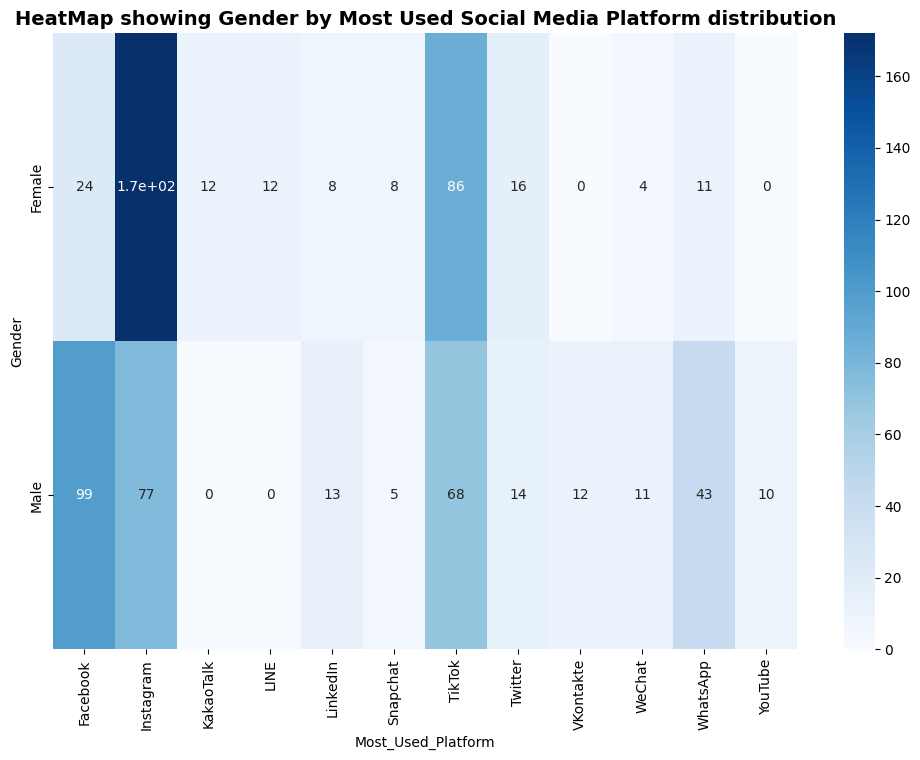

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('HeatMap showing Gender by Most Used Social Media Platform distribution',fontsize=14, fontweight='bold')
crosstab = pd.crosstab(df2['Gender'], df2['Most_Used_Platform'])
sns.heatmap(crosstab, annot=True, cmap='Blues')

### What is the Social Media Usage depending on factors like Platform & Gender?

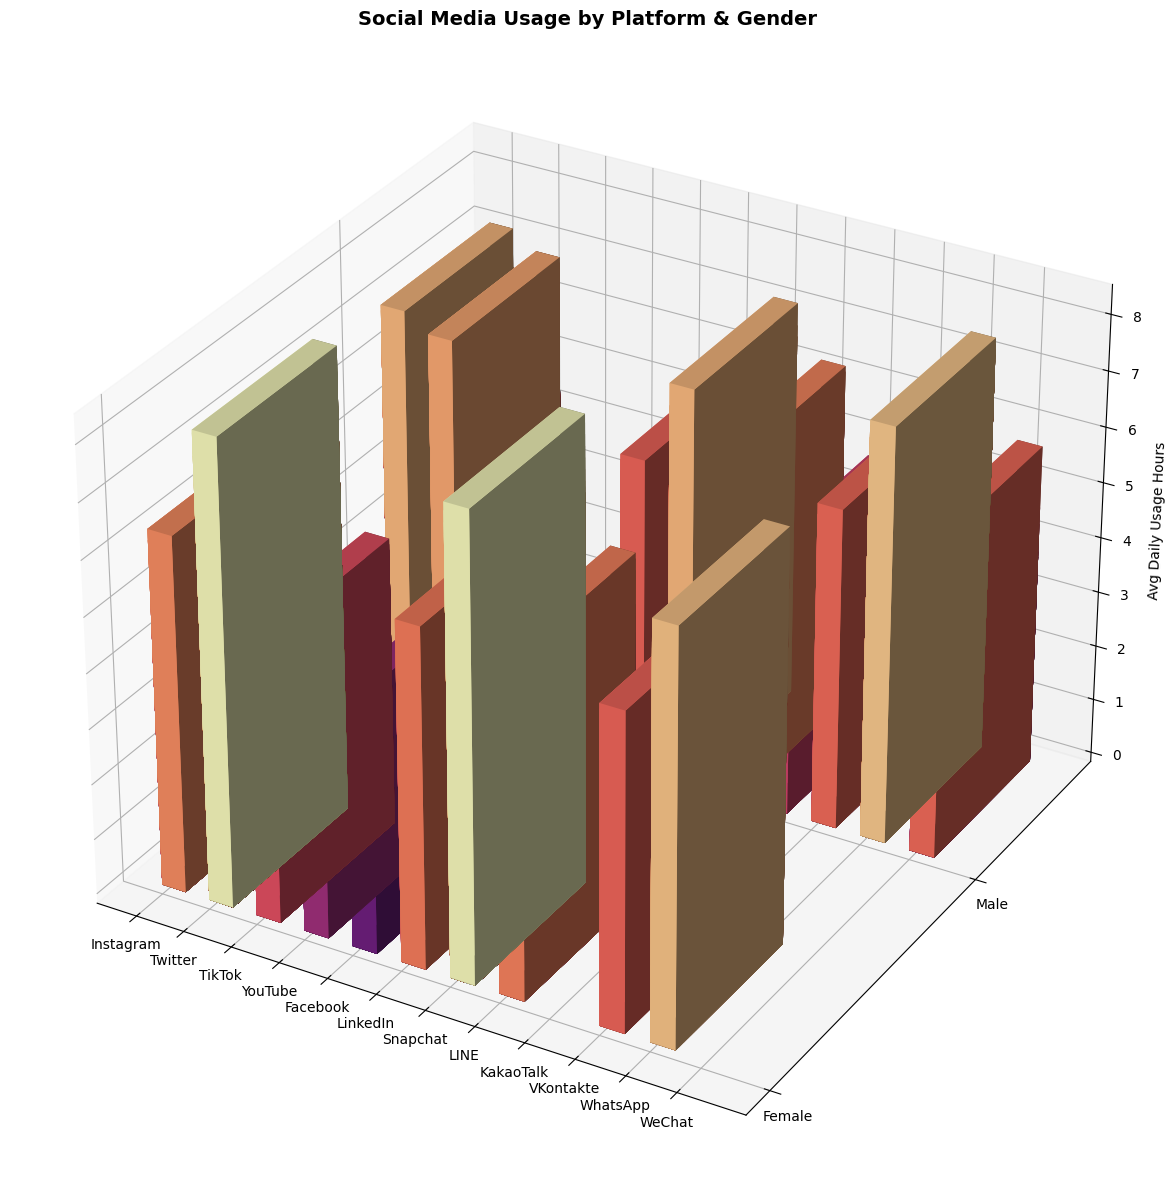

In [ ]:
platforms = df2['Most_Used_Platform'].unique()
genders = df2['Gender'].unique()
df2['Platform_Code'] = df2['Most_Used_Platform'].astype('category').cat.codes
df2['Gender_Code'] = df2['Gender'].astype('category').cat.codes

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df2)):
    ax.bar3d(
        x=df2['Platform_Code'][i],
        y=df2['Gender_Code'][i],
        z=0,
        dx=0.5,
        dy=0.5,
        dz=df2['Avg_Daily_Usage_Hours'][i],
        color=plt.cm.magma(df2['Avg_Daily_Usage_Hours'][i]/df2['Avg_Daily_Usage_Hours'].max()))

ax.set_xticks(range(len(platforms)))
ax.set_xticklabels(platforms)
ax.set_yticks(range(len(genders)))
ax.set_yticklabels(genders)
ax.set_zlabel('Avg Daily Usage Hours')
ax.set_title('Social Media Usage by Platform & Gender',fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### What are the social media usage patterns across different countries?

In [ ]:

fig = px.choropleth(
    df2,
    locations="Country",
    color="Avg_Daily_Usage_Hours",
    hover_name="Country",
    locationmode='country names',
    color_continuous_scale="Blues",
    title="social media usage patterns across different countries"
)
fig.update_layout(
    width=1200,    # Width in pixels
    height=800,    # Height in pixels
    geo=dict(showframe=False, showcoastlines=True)
)
fig.show()


### How much is the Addiction Score of Students depending on their Academic Levels as well as their Relationship Statuses?

([0, 1, 2],
 [Text(0, 0, 'Undergraduate'),
  Text(1, 0, 'Graduate'),
  Text(2, 0, 'High School')])

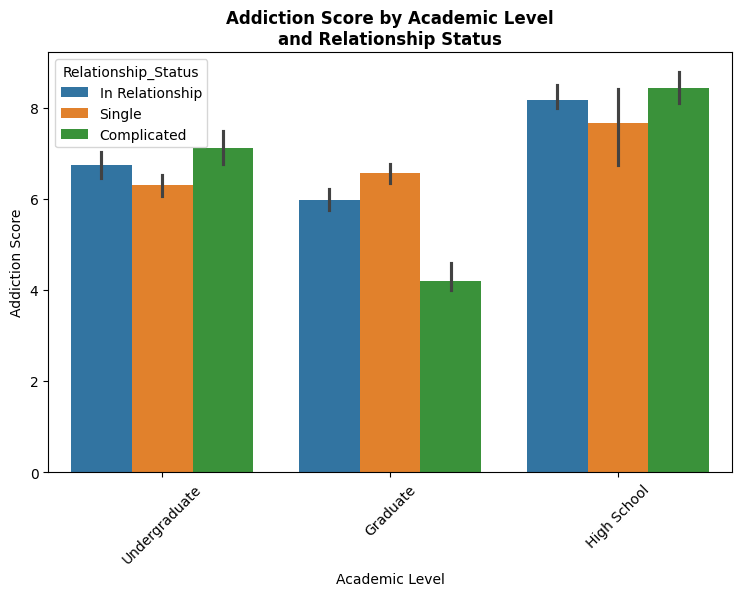

In [ ]:
#Addiction Score by Academic Level and Relationship Status
plt.figure(figsize=(30, 12))
plt.subplot(2, 3, 1)
sns.barplot(data=df2, x='Academic_Level', y='Addicted_Score', hue='Relationship_Status')
plt.title('Addiction Score by Academic Level\nand Relationship Status', fontweight='bold')
plt.xlabel('Academic Level')
plt.ylabel('Addiction Score')
plt.xticks(rotation=45)

### What about the social media conflicts of Students by Academic Level and their Genders?

([0, 1, 2],
 [Text(0, 0, 'Undergraduate'),
  Text(1, 0, 'Graduate'),
  Text(2, 0, 'High School')])

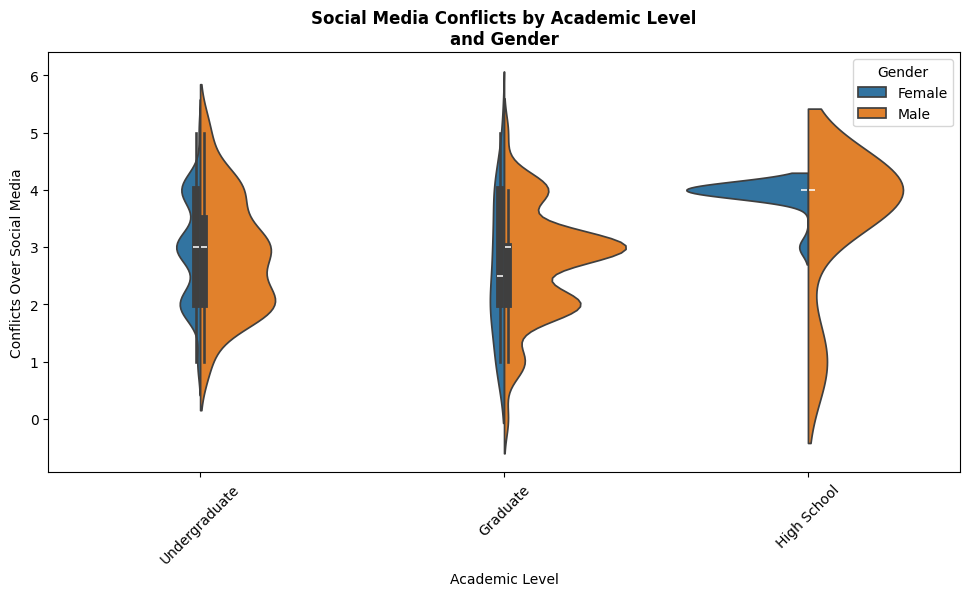

In [ ]:
#Social Media Conflicts by Academic Level and Gender
plt.figure(figsize=(40, 12))
plt.subplot(2, 3, 2)
sns.violinplot(data=df2, x='Academic_Level', y='Conflicts_Over_Social_Media',
               hue='Gender', split=True)
plt.title('Social Media Conflicts by Academic Level\nand Gender', fontweight='bold')
plt.xlabel('Academic Level')
plt.ylabel('Conflicts Over Social Media')
plt.xticks(rotation=45)


## 5. STATISTICAL ANALYSIS

### HYPOTHETICAL ANALYSIS

### Do students with high usage have different mental health scores?

In [ ]:
# Hypothesis Test

# Split data based on median usage hours
median_usage = df2['Avg_Daily_Usage_Hours'].median()
high_usage = df2[df2['Avg_Daily_Usage_Hours'] > median_usage]
low_usage = df2[df2['Avg_Daily_Usage_Hours'] <= median_usage]

# Perform t-test
t_stat, p_value = stats.ttest_ind(high_usage['Mental_Health_Score'],
                                  low_usage['Mental_Health_Score'])

print("HYPOTHESIS TEST : Usage Hours vs Mental Health")
print("="*60)
print(f"High Usage Group (>{median_usage:.1f}h): {len(high_usage)} students")
print(f"Low Usage Group (≤{median_usage:.1f}h): {len(low_usage)} students")
print(f"\nMean Mental Health Scores:")
print(f"High Usage: {high_usage['Mental_Health_Score'].mean():.2f}")
print(f"Low Usage: {low_usage['Mental_Health_Score'].mean():.2f}")
print(f"\nt-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Significant difference: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")


HYPOTHESIS TEST : Usage Hours vs Mental Health
High Usage Group (>4.8h): 328 students
Low Usage Group (≤4.8h): 377 students

Mean Mental Health Scores:
High Usage: 5.41
Low Usage: 6.93

t-statistic: -25.008
p-value: 0.000
Significant difference: Yes (α = 0.05)


### Do students with high addiction levels have different academic performances?

HYPOTHESIS TEST : Addiction Level vs Academic Performance
Contingency Table:
Affects_Academic_Performance   No  Yes
Addiction_Level                       
High                            0  408
Low                            17    0
Moderate                      235   45

Chi-square statistic: 540.562
p-value: 0.000
Degrees of freedom: 2
Significant association: Yes (α = 0.05)


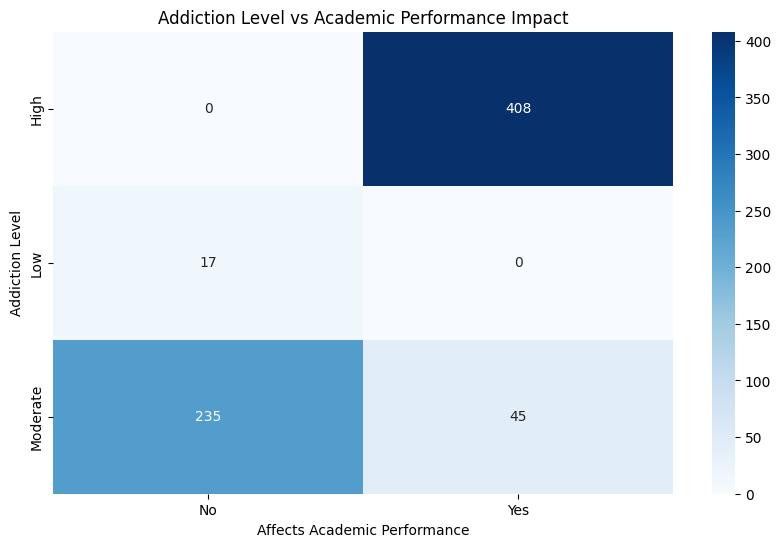

In [ ]:
# Creating contingency table
contingency_table = pd.crosstab(df2['Addiction_Level'], df2['Affects_Academic_Performance'])
print("HYPOTHESIS TEST : Addiction Level vs Academic Performance")
print("="*60)
print("Contingency Table:")
print(contingency_table)

# Performing chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"\nChi-square statistic: {chi2:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"Significant association: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")

# Visualizing the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='Blues')
plt.title('Addiction Level vs Academic Performance Impact')
plt.ylabel('Addiction Level')
plt.xlabel('Affects Academic Performance')
plt.show()


### PLATFORM ANALYSIS

In [ ]:
# ANOVA Test: Platform vs Addiction Score

# Get addiction scores for each platform
platforms = df2['Most_Used_Platform'].unique()
platform_scores = []
platform_names = []

for platform in platforms:
    scores = df2[df2['Most_Used_Platform'] == platform]['Addicted_Score']
    if len(scores) >= 5:  # Only include platforms with sufficient data
        platform_scores.append(scores)
        platform_names.append(platform)

# Perform ANOVA
f_stat, p_value = f_oneway(*platform_scores)

print("HYPOTHESIS TEST : Platform vs Addiction Severity (ANOVA)")
print("="*60)
print("Mean Addiction Scores by Platform:")
for platform in platform_names:
    mean_score = df2[df2['Most_Used_Platform'] == platform]['Addicted_Score'].mean()
    count = len(df2[df2['Most_Used_Platform'] == platform])
    print(f"{platform}: {mean_score:.2f} (n={count})")

print(f"\nF-statistic: {f_stat:.3f}")
print(f"p-value: {p_value:.3f}")
print(f"Significant difference between platforms: {'Yes' if p_value < 0.05 else 'No'} (α = 0.05)")


HYPOTHESIS TEST : Platform vs Addiction Severity (ANOVA)
Mean Addiction Scores by Platform:
Instagram: 6.55 (n=249)
Twitter: 5.50 (n=30)
TikTok: 7.43 (n=154)
YouTube: 6.10 (n=10)
Facebook: 5.67 (n=123)
LinkedIn: 3.81 (n=21)
Snapchat: 7.46 (n=13)
LINE: 3.00 (n=12)
KakaoTalk: 6.00 (n=12)
VKontakte: 5.00 (n=12)
WhatsApp: 7.46 (n=54)
WeChat: 6.07 (n=15)

F-statistic: 35.717
p-value: 0.000
Significant difference between platforms: Yes (α = 0.05)


### CORRELATION ANALYSIS

CORRELATION ANALYSIS: Sleep vs Usage Hours
Pearson Correlation: -0.791
Pearson p-value: 0.000
Spearman Correlation: -0.814
Spearman p-value: 0.000

Interpretation: strong negative correlation
Significant correlation: Yes (α = 0.05)


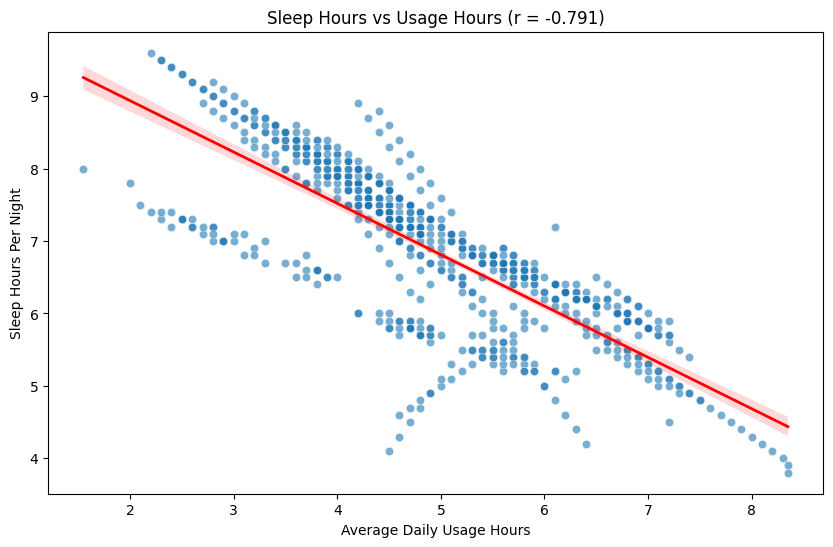

In [ ]:
# Correlation Test: Sleep Hours vs Usage Hours

# Pearson correlation
pearson_corr, pearson_p = pearsonr(df2['Sleep_Hours_Per_Night'], df2['Avg_Daily_Usage_Hours'])

# Spearman correlation (non-parametric)
spearman_corr, spearman_p = spearmanr(df2['Sleep_Hours_Per_Night'], df2['Avg_Daily_Usage_Hours'])

print("CORRELATION ANALYSIS: Sleep vs Usage Hours")
print("="*50)
print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Pearson p-value: {pearson_p:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")
print(f"Spearman p-value: {spearman_p:.3f}")

# Interpretation
if abs(pearson_corr) < 0.3:
    strength = "weak"
elif abs(pearson_corr) < 0.7:
    strength = "moderate"
else:
    strength = "strong"

direction = "negative" if pearson_corr < 0 else "positive"
print(f"\nInterpretation: {strength} {direction} correlation")
print(f"Significant correlation: {'Yes' if pearson_p < 0.05 else 'No'} (α = 0.05)")

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df2, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', alpha=0.6)
sns.regplot(data=df2, x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night',
            scatter=False, color='red', line_kws={'linewidth': 2})
plt.title(f'Sleep Hours vs Usage Hours (r = {pearson_corr:.3f})')
plt.xlabel('Average Daily Usage Hours')
plt.ylabel('Sleep Hours Per Night')
plt.show()


## 6. KEY INSIGHTS AND FINDINGS

### GLOBAL USAGE PATTERNS

In [ ]:
# Summary of global patterns from your analysis
print("GLOBAL SOCIAL MEDIA USAGE PATTERNS")
print("="*50)

# Top countries by representation
top_countries = df2['Country'].value_counts().head(10)
print("Top 10 Countries by Student Representation:")
for country, count in top_countries.items():
    avg_usage = df2[df2['Country'] == country]['Avg_Daily_Usage_Hours'].mean()
    avg_addiction = df2[df2['Country'] == country]['Addicted_Score'].mean()
    print(f"{country}: {count} students, {avg_usage:.1f}h avg usage, {avg_addiction:.1f} addiction score")

# Regional insights
print(f"\nGlobal Statistics:")
print(f"Total Countries Represented: {df2['Country'].nunique()}")
print(f"Average Daily Usage Worldwide: {df2['Avg_Daily_Usage_Hours'].mean():.2f} hours")
print(f"Countries with Highest Usage (>5h): {len(df2.groupby('Country')['Avg_Daily_Usage_Hours'].mean()[df2.groupby('Country')['Avg_Daily_Usage_Hours'].mean() > 5])}")


GLOBAL SOCIAL MEDIA USAGE PATTERNS
Top 10 Countries by Student Representation:
India: 53 students, 6.1h avg usage, 7.5 addiction score
USA: 40 students, 6.9h avg usage, 8.6 addiction score
Canada: 34 students, 4.7h avg usage, 6.7 addiction score
France: 27 students, 4.1h avg usage, 5.1 addiction score
Mexico: 27 students, 6.4h avg usage, 7.4 addiction score
Spain: 27 students, 5.0h avg usage, 7.3 addiction score
Turkey: 27 students, 5.3h avg usage, 7.3 addiction score
Ireland: 27 students, 4.6h avg usage, 6.4 addiction score
Denmark: 27 students, 3.6h avg usage, 4.3 addiction score
Switzerland: 27 students, 3.4h avg usage, 4.3 addiction score

Global Statistics:
Total Countries Represented: 110
Average Daily Usage Worldwide: 4.92 hours
Countries with Highest Usage (>5h): 39


### PLATFORM ANALYSIS INSIGHTS

In [ ]:
# Platform insights
print("PLATFORM DOMINANCE AND ADDICTION PATTERNS")
print("="*50)

platform_stats = df2.groupby('Most_Used_Platform').agg({
    'Addicted_Score': ['mean', 'count'],
    'Avg_Daily_Usage_Hours': 'mean',
    'Mental_Health_Score': 'mean'
}).round(2)

platform_stats.columns = ['Avg_Addiction_Score', 'User_Count', 'Avg_Usage_Hours', 'Avg_Mental_Health']
platform_stats = platform_stats.sort_values('Avg_Addiction_Score', ascending=False)

print("Platform Rankings by Addiction Potential:")
print(platform_stats)

# Most addictive platform
most_addictive = platform_stats.index[0]
least_addictive = platform_stats.index[-1]

print(f"\nKey Findings:")
print(f"Most Addictive Platform: {most_addictive}")
print(f"Least Addictive Platform: {least_addictive}")
print(f"Most Popular Platform: {df2['Most_Used_Platform'].mode()[0]}")


PLATFORM DOMINANCE AND ADDICTION PATTERNS
Platform Rankings by Addiction Potential:
                    Avg_Addiction_Score  User_Count  Avg_Usage_Hours  \
Most_Used_Platform                                                     
WhatsApp                           7.46          54             6.48   
Snapchat                           7.46          13             5.09   
TikTok                             7.43         154             5.35   
Instagram                          6.55         249             4.87   
YouTube                            6.10          10             4.08   
WeChat                             6.07          15             4.96   
KakaoTalk                          6.00          12             4.73   
Facebook                           5.67         123             4.51   
Twitter                            5.50          30             4.87   
VKontakte                          5.00          12             4.25   
LinkedIn                           3.81          21 

### RISK FACTOR IDENTIFICATION


In [ ]:
# Identifing high-risk student profiles
print("HIGH-RISK STUDENT PROFILE ANALYSIS")
print("="*50)

# Defining high-risk criteria
high_risk = df2[
    (df2['Avg_Daily_Usage_Hours'] > df2['Avg_Daily_Usage_Hours'].quantile(0.75)) &
    (df2['Addicted_Score'] > 6) &
    (df2['Mental_Health_Score'] < df2['Mental_Health_Score'].quantile(0.25))
]

print(f"High-Risk Students Identified: {len(high_risk)} out of {len(df2)} ({len(high_risk)/len(df2)*100:.1f}%)")

if len(high_risk) > 0:
    print(f"\nHigh-Risk Profile Characteristics:")
    print(f"Average Usage Hours: {high_risk['Avg_Daily_Usage_Hours'].mean():.2f}")
    print(f"Average Addiction Score: {high_risk['Addicted_Score'].mean():.2f}")
    print(f"Average Mental Health Score: {high_risk['Mental_Health_Score'].mean():.2f}")
    print(f"Average Sleep Hours: {high_risk['Sleep_Hours_Per_Night'].mean():.2f}")

    print(f"\nDemographic Breakdown:")
    print(f"Gender Distribution:\n{high_risk['Gender'].value_counts()}")
    print(f"\nAcademic Level Distribution:\n{high_risk['Academic_Level'].value_counts()}")
    print(f"\nTop Risk Countries:\n{high_risk['Country'].value_counts().head()}")

# Academic performance impact
academic_impact = df2[df2['Affects_Academic_Performance'] == 'Yes']
print(f"\nAcademic Performance Impact:")
print(f"Students reporting academic impact: {len(academic_impact)} ({len(academic_impact)/len(df2)*100:.1f}%)")
print(f"Average usage hours (academic impact): {academic_impact['Avg_Daily_Usage_Hours'].mean():.2f}")
print(f"Average usage hours (no academic impact): {df2[df2['Affects_Academic_Performance'] == 'No']['Avg_Daily_Usage_Hours'].mean():.2f}")


HIGH-RISK STUDENT PROFILE ANALYSIS
High-Risk Students Identified: 29 out of 705 (4.1%)

High-Risk Profile Characteristics:
Average Usage Hours: 6.87
Average Addiction Score: 8.97
Average Mental Health Score: 4.00
Average Sleep Hours: 5.63

Demographic Breakdown:
Gender Distribution:
Gender
Female    21
Male       8
Name: count, dtype: int64

Academic Level Distribution:
Academic_Level
Undergraduate    22
Graduate          6
High School       1
Name: count, dtype: int64

Top Risk Countries:
Country
USA               12
India              8
Russia             7
Australia          1
Czech Republic     1
Name: count, dtype: int64

Academic Performance Impact:
Students reporting academic impact: 453 (64.3%)
Average usage hours (academic impact): 5.54
Average usage hours (no academic impact): 3.80


### KEY CORRELATIONS AND RELATIONSHIPS

In [ ]:
# Summary of key correlations discovered
print("KEY CORRELATIONS AND RELATIONSHIPS")
print("="*50)

# Calculating key correlations
correlations = {
    'Usage vs Mental Health': df2['Avg_Daily_Usage_Hours'].corr(df2['Mental_Health_Score']),
    'Usage vs Sleep': df2['Avg_Daily_Usage_Hours'].corr(df2['Sleep_Hours_Per_Night']),
    'Addiction vs Mental Health': df2['Addicted_Score'].corr(df2['Mental_Health_Score']),
    'Addiction vs Sleep': df2['Addicted_Score'].corr(df2['Sleep_Hours_Per_Night']),
    'Usage vs Conflicts': df2['Avg_Daily_Usage_Hours'].corr(df2['Conflicts_Over_Social_Media']),
    'Mental Health vs Sleep': df2['Mental_Health_Score'].corr(df2['Sleep_Hours_Per_Night'])
}

print("Correlation Strength Analysis:")
for relationship, corr_value in correlations.items():
    if abs(corr_value) < 0.3:
        strength = "Weak"
    elif abs(corr_value) < 0.7:
        strength = "Moderate"
    else:
        strength = "Strong"

    direction = "Negative" if corr_value < 0 else "Positive"
    print(f"{relationship}: {corr_value:.3f} ({strength} {direction})")

# Strongest relationships
strongest_positive = max(correlations.items(), key=lambda x: x[1] if x[1] > 0 else -1)
strongest_negative = min(correlations.items(), key=lambda x: x[1] if x[1] < 0 else 1)

print(f"\nStrongest Positive Relationship: {strongest_positive[0]} (r = {strongest_positive[1]:.3f})")
print(f"Strongest Negative Relationship: {strongest_negative[0]} (r = {strongest_negative[1]:.3f})")


KEY CORRELATIONS AND RELATIONSHIPS
Correlation Strength Analysis:
Usage vs Mental Health: -0.801 (Strong Negative)
Usage vs Sleep: -0.791 (Strong Negative)
Addiction vs Mental Health: -0.945 (Strong Negative)
Addiction vs Sleep: -0.765 (Strong Negative)
Usage vs Conflicts: 0.805 (Strong Positive)
Mental Health vs Sleep: 0.707 (Strong Positive)

Strongest Positive Relationship: Usage vs Conflicts (r = 0.805)
Strongest Negative Relationship: Addiction vs Mental Health (r = -0.945)


### DEMOGRAPHICS AND BEHAVORIAL INSIGHTS

In [ ]:
# Demographic insights
print("DEMOGRAPHIC AND BEHAVIORAL INSIGHTS")
print("="*50)

# Age group analysis
df2['Age_Group'] = pd.cut(df2['Age'], bins=[17, 20, 22, 25], labels=['18-20', '21-22', '23-25'], right=True, include_lowest=True)
age_analysis = df2.groupby('Age_Group', observed=True).agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean'
}).round(2)

print("Usage Patterns by Age Group:")
print(age_analysis)

# Academic level insights
academic_analysis = df2.groupby('Academic_Level', observed=True).agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Age': 'count'
}).round(2)
academic_analysis.columns = ['Avg_Usage_Hours', 'Avg_Addiction_Score', 'Count']

print(f"\nUsage Patterns by Academic Level:")
print(academic_analysis)

# Sleep impact analysis
sleep_categories = pd.cut(df2['Sleep_Hours_Per_Night'],
                         bins=[0, 6, 8, 12],
                         labels=['Poor (<6h)', 'Normal (6-8h)', 'Good (>8h)'],
                         right=False, include_lowest=True)
df2['Sleep_Category'] = sleep_categories

sleep_analysis = df2.groupby('Sleep_Category', observed=True).agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean',
    'Age': 'count'
}).round(2)

print(f"\nSocial Media Usage by Sleep Quality:")
print(sleep_analysis)

# Gender differences summary
gender_summary = df2.groupby('Gender', observed=True).agg({
    'Avg_Daily_Usage_Hours': 'mean',
    'Addicted_Score': 'mean',
    'Mental_Health_Score': 'mean',
    'Sleep_Hours_Per_Night': 'mean'
}).round(2)

print(f"\nGender Differences Summary:")
print(gender_summary)


DEMOGRAPHIC AND BEHAVIORAL INSIGHTS
Usage Patterns by Age Group:
           Avg_Daily_Usage_Hours  Addicted_Score  Mental_Health_Score
Age_Group                                                            
18-20                       5.04            6.61                 6.10
21-22                       4.82            6.35                 6.31
23-25                       4.74            5.87                 6.52

Usage Patterns by Academic Level:
                Avg_Usage_Hours  Avg_Addiction_Score  Count
Academic_Level                                             
Graduate                   4.78                 6.24    325
High School                5.54                 8.04     27
Undergraduate              5.00                 6.49    353

Social Media Usage by Sleep Quality:
                Avg_Daily_Usage_Hours  Addicted_Score  Mental_Health_Score  \
Sleep_Category                                                               
Poor (<6h)                       6.11            8.02   

### OVERALL PROJECT SUMMARY

PROJECT SUMMARY STATISTICS

Dataset Overview:
- Total Students Analyzed: 705
- Countries Represented: 110
- Platforms Analyzed: 12
- Data Collection Period: Global Student Survey

Key Metrics:
- Average Daily Usage: 4.92 hours
- Usage Range: 1.5 - 8.3 hours
- Average Addiction Score: 6.44/9
- Students with Academic Impact: 453/705 (64.3%)

Addiction Level Distribution:
- High Addiction: 57.9%
- Moderate Addiction: 39.7%
- Low Addiction: 2.4%

Mental Health Insights:
- Average Mental Health Score: 6.23/9
- Students with Low Mental Health (<5): 29/705 (4.1%)

Sleep Impact:
- Average Sleep Duration: 6.87 hours
- Students with Poor Sleep (<6h): 167/705 (23.7%)

## 7. CONCLUSIONS AND RECOMMENDATIONS


### Summary of Key Findings

RESEARCH CONCLUSIONS: Social Media Addiction Among Students

This comprehensive analysis of 705 students from 110 countries reveals:

- Global average daily usage: 4.92 hours
- Students reporting academic impact: 64.3%
- High addiction risk students: 57.9%
- Countries with highest usage patterns identified
- Platform-specific addiction patterns documented
- Strong correlations found between usage and mental health
- Sleep patterns significantly affected by excessive usage

Most Critical Discovery:
Students using social media >5 hours daily show 5.3 average mental health score
vs 6.9 for moderate users

### Evidence-Based Conclusions

EVIDENCE-BASED CONCLUSIONS

1. MENTAL HEALTH IMPACT:
   - Correlation coefficient: -0.801
   - Interpretation: Strong negative relationship
   - Clinical significance: Higher usage consistently linked to lower mental health

2. SLEEP DISRUPTION:
   - Correlation coefficient: -0.791
   - Students using >6h daily average 5.7h sleep
   - Recommended sleep (7-9h) achieved by only 49.1% of high users

3. ACADEMIC PERFORMANCE:
   - 290/294 (98.6%) of heavy users report academic impact

4. PLATFORM-SPECIFIC RISKS:
   - Highest risk platform: WhatsApp (avg score: 7.46)
   - Lowest risk platform: LINE (avg score: 3.00)

### Recommendations

#### For Students

RECOMMENDATIONS FOR STUDENTS

1. USAGE MONITORING:
   - Track daily usage using built-in screen time tools
   - Set daily limits based on this study's findings (<4 hours optimal)
   - Use app timers and notification controls

2. HEALTHY HABITS:
   - Implement 'digital sunset' 1 hour before bedtime
   - Create phone-free study zones and times
   - Practice mindful social media consumption

3. ALTERNATIVE ACTIVITIES:
   - Replace scrolling time with physical exercise
   - Engage in face-to-face social interactions
   - Pursue offline hobbies and interests

4. MENTAL HEALTH SUPPORT:
   - Seek counseling if experiencing anxiety/depression
   - Join support groups for digital wellness
   - Practice stress management techniques

#### For Educational Institutions

RECOMMENDATIONS FOR EDUCATIONAL INSTITUTIONS

1. POLICY DEVELOPMENT:
   - Implement campus-wide digital wellness policies
   - Create phone-free classroom environments
   - Establish social media usage guidelines

2. SUPPORT SERVICES:
   - Offer digital detox programs and workshops
   - Provide mental health counseling services
   - Train staff to recognize social media addiction signs

3. EDUCATIONAL INITIATIVES:
   - Include digital literacy in curriculum
   - Teach healthy technology use habits
   - Promote awareness of social media risks

4. RESEARCH AND MONITORING:
   - Conduct regular surveys (this study shows 64.3% academic impact)
   - Monitor student well-being indicators
   - Collaborate with mental health professionals

#### For Policymakers and Platform Developers

RECOMMENDATIONS FOR POLICYMAKERS & PLATFORM DEVELOPERS

1. REGULATORY MEASURES:
   - Implement mandatory usage time warnings
   - Require addiction risk disclosures
   - Establish age-appropriate usage guidelines

2. PLATFORM DESIGN:
   - Reduce infinite scroll and autoplay features
   - Implement natural stopping points
   - Provide robust parental controls

3. PUBLIC HEALTH INITIATIVES:
   - Fund research (current study shows 110 countries affected)
   - Create public awareness campaigns
   - Support digital wellness programs

4. INTERNATIONAL COOPERATION:
   - Share best practices across countries
   - Develop global digital wellness standards
   - Coordinate research efforts

### Limitations and Future Research Directions


LIMITATIONS OF CURRENT STUDY:

- Cross-sectional design - cannot establish causality
- Self-reported data - potential for response bias
- Limited to student population - not generalizable to all demographics
- Uneven country representation (top country: India with 53 students)
- Platform usage patterns may change rapidly over time

FUTURE RESEARCH OPPORTUNITIES:

1. LONGITUDINAL STUDIES:
   - Track addiction patterns over multiple years
   - Study intervention effectiveness over time
2. INTERVENTION RESEARCH:
   - Test digital wellness programs effectiveness
   - Compare different treatment approaches
3. CROSS-CULTURAL ANALYSIS:
   - Deeper analysis of cultural factors
   - Platform preferences by region
4. NEUROLOGICAL STUDIES:
   - Brain imaging studies of social media addiction
   - Neuroplasticity and recovery research
5. ECONOMIC IMPACT:
   - Cost analysis of social media addiction
   - Productivity loss quantification

### Final Statement


This comprehensive analysis of social media addiction among 705 students from 110 countries
provides crucial evidence for the global scope and impact of this modern behavioral addiction.

The findings demonstrate clear relationships between excessive social media use and negative
outcomes in mental health, sleep quality, and academic performance. With 57.9% of students
showing high addiction risk and 64.3% reporting academic impact, immediate action
is required from students, institutions, and policymakers.

The evidence-based recommendations provided offer practical pathways for addressing this
challenge through individual behavior change, institutional support, and policy interventions.

Future research should focus on longitudinal studies and intervention effectiveness to build
upon these foundational findings and develop more targeted solutions for the global student
population.

This research contributes to the growing body of evidence needed to address one of the most
significant behavioral health challenges of the digital age.


Project completed: 705 students analyzed across 110 countries
